In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 단층퍼셉트론

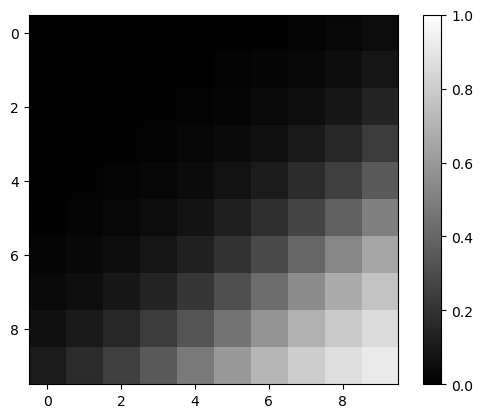

In [3]:
# -1 ~ 1 까지 0.2 간격으로 10개
x = np.arange(-1.0,1.0,0.2)
y = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
z = np.zeros((10,10))

# x, y 값의 가중치(가중치값을 바꿔가면서 테스트)
w_x = 2.5
w_y = 3.0
# w_x = 0
# w_y = 3.0
# w_x = 2.5
# w_y = 0

# 편향(편향값을 바꿔가면서 테스트)
#bias = 0.1
bias = -2
#bias = 2

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        # x에 가중치를 곱하고 편향을 더한 값
        u = x[i]*w_x + y[j]*w_y + bias
        # 활성화 함수(시그모이드 함수)
        y0 = 1/(1 + np.exp(-u))
        # 출력값 저장
        z[j][i] = y0

# 그리드맵 표시
plt.imshow(z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

##### 단층신경망

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

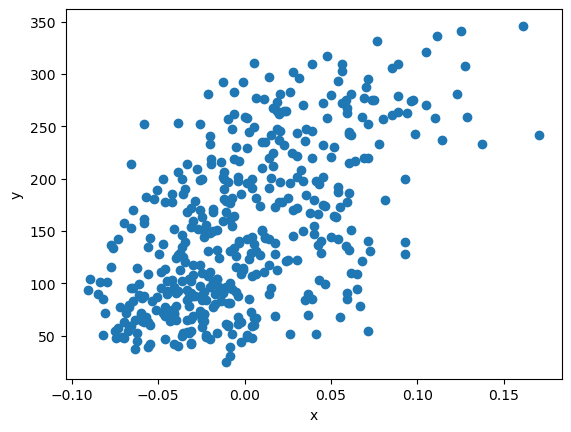

In [5]:
#bmi와 당수치는 양의 상관관계
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') #bmi
plt.ylabel('y') #당수치
plt.show()

In [6]:
X = diabetes.data[:, 2]
y = diabetes.target

class Model:
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 편향 초기화

    def forward(self, x):
        y_hat = x * self.w + self.b
        return y_hat    # 순전파

    def backward(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs): # epoch만큼 반복
            for x_i, y_i in zip(x, y): # 모든 샘플 반복
                y_hat = self.forward(x_i) # 순전파
                # 오차 계산(실제값 - 예측값)
                err = -(y_i - y_hat)
                # 역전파
                w_grad, b_grad = self.backward(x_i, err)
                self.w -= w_grad # 가중치 수정
                self.b -= b_grad # 절편 수정
            print('epoch:'+str(i+1)+',error:'+str(err),',w:',str(w_grad),',b:'+str(b_grad))

In [7]:
model = Model()
model.fit(X, y)

epoch:1,error:97.992641777963 ,w: -7.156432293026746 ,b:97.992641777963
epoch:2,error:74.35088978164467 ,w: -5.4298679879889935 ,b:74.35088978164467
epoch:3,error:65.88050094558986 ,w: -4.811272927166092 ,b:65.88050094558986
epoch:4,error:62.845722176015684 ,w: -4.589642114946713 ,b:62.845722176015684
epoch:5,error:61.75841882329888 ,w: -4.510236021953222 ,b:61.75841882329888
epoch:6,error:61.36885876947157 ,w: -4.481786333295987 ,b:61.36885876947157
epoch:7,error:61.22928683201846 ,w: -4.471593352453069 ,b:61.22928683201846
epoch:8,error:61.179280868796525 ,w: -4.467941401821344 ,b:61.179280868796525
epoch:9,error:61.16136468590632 ,w: -4.46663297756135 ,b:61.16136468590632
epoch:10,error:61.15494565928091 ,w: -4.466164194103752 ,b:61.15494565928091
epoch:11,error:61.15264584446703 ,w: -4.4659962379317015 ,b:61.15264584446703
epoch:12,error:61.15182186468206 ,w: -4.4659360624385736 ,b:61.15182186468206
epoch:13,error:61.15152664844041 ,w: -4.465914502707078 ,b:61.15152664844041
epoch:

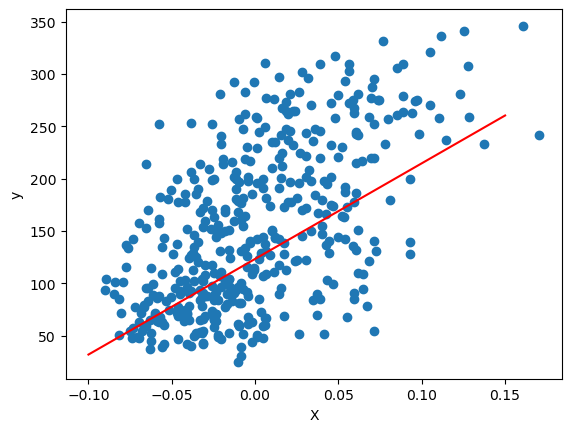

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
pt1 = (-0.1, -0.1 * model.w + model.b)
pt2 = (0.15, 0.15 * model.w + model.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], c='r') #회귀선
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##### 회귀분석

[[0.10667615 0.11473686 0.13221275 0.16895435 0.2414415  0.36803037
  0.54814068 0.74116003 0.89223209 0.97836824]
 [0.11473686 0.13221275 0.16895435 0.2414415  0.36803037 0.54814068
  0.74116003 0.89223209 0.97836824 1.00514825]]


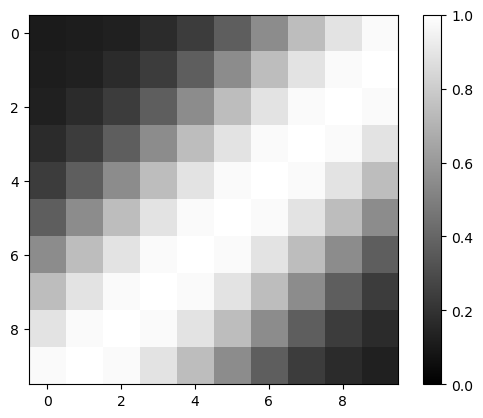

In [9]:
# -1 ~ 1 0.2 간격의 10개의 리스트
x = np.arange(-1.0, 1.0, 0.2)
y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10X10 그리드
z = np.zeros((10,10))

# 가중치
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])   # hidden layer에 사용할 가중치 행렬
w_mo = np.array([[1.0], [-1.0]])            # output layer에 사용할 가중치 행렬

# 편향
b_im = np.array([3.0,-3.0])     # 은닉층
b_mo = np.array([0.1])          # 출력층 

# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b        # 행렬곱셈
    return 1/(1+np.exp(-u))     # 활성화함수(시그모이드 함수)

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 활성화함수(항등함수)

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):

        # 순전파
        inp = np.array([x[i], y[j]]) # 입력층
        hid = hidden_layer(inp, w_im, b_im) # 은닉층
        out = output_layer(hid, w_mo, b_mo) # 출력층

        # 그리드맵에 신경망 출력 값 저장
        z[j][i] = out[0]

print(z[:2])
# 그리드맵으로 표시
plt.imshow(z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

* 인위적으로 만든 나이와 키 데이터로 나이와 키의 상관관계를
분석하는 회귀분석 실습

In [10]:
import numpy as np

# 데이터 생성
np.random.seed(seed=1) # 난수 고정
X_min = 4 # X의 하한
X_max = 30 # X의 상한
X_n = 16

# 랜덤으로 만든 나이 데이터
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수

# 랜덤으로 만든 신장 데이터
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) 

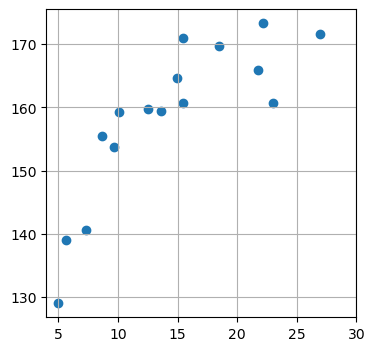

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# 평균제곱오차 함수
# x 나이, t 키, w 기울기와 편차
def mse(x, t, w):
    # 예측값: x에 기울기를 곱하고 편차를 더한 값
    y = w[0] * x + w[1]
    return np.mean((y - t)**2)

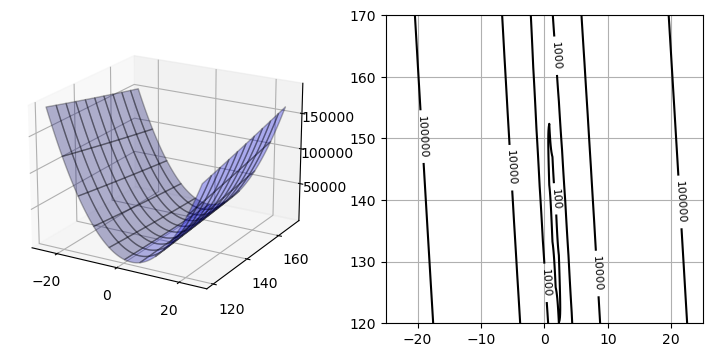

In [13]:
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)

# 직사각형 격자를 만들고
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        #평균제곱오차를 계산하여 리스트에 저장
        J[i1, i0] = mse(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9, 4))                  #3d 차트
ax = plt.subplot(1, 2, 1, projection='3d')  #1행 2열 중 첫번째 서브플롯
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,color='blue', edgecolor='black')
# rstride : row stride 행방향 이동, cstride : column stride 열방향 이동
# 곡면플롯
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)
plt.subplot(1, 2, 2) #1행 2열 중 두번째 서브플롯
#등고선
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
#등고선 플롯의 고도각(Elevation)에 레이블 지정
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()

In [14]:
# 왼쪽 그래프 : 평균 제곱 오차는 계곡 모양, 기울기의 변화에 따라 평균제곱오차가 크게 바뀜
# 오른쪽 그래프 : 기울기의 변화에 따라 등고선의 간격으로 오차를 확인할 수 있음, 계곡의 최저점은 135 근처

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), T)

print("예측:", lin_reg.predict(X.reshape(-1,1)))
print('실제:', T)

예측: [159.89837782 171.70878832 143.6642537  155.43244258 149.37438324
 147.25540754 150.91265694 157.11572006 159.10967899 164.64098892
 159.982974   170.3418217  151.62104361 177.8531475  144.72625588
 169.76738836]
실제: [170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = lin_reg.predict(X.reshape(-1,1))

#평균제곱오차
lin_mse = mean_squared_error(T, pred)
print(lin_mse)

#평균제곱근오차
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

#평균절대오차
lin_mae = mean_absolute_error(T, pred)
print(lin_mae)

49.01219534293871
7.000871041730358
6.04840106086346


In [17]:
from scipy import stats

slope,intercept,r_value,p_value,stderr=stats.linregress(X,T)
slope,intercept,r_value,p_value,stderr

(1.557575151733216,
 135.87192425880238,
 0.8186717367421233,
 0.00010543850320672935,
 0.2920015150467393)

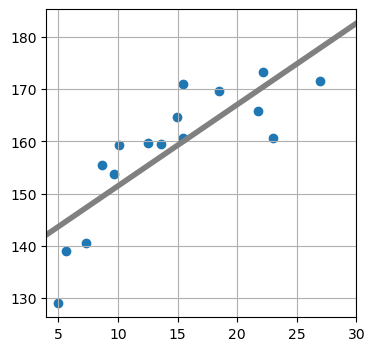

In [18]:
# 회귀선 표시
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

plt.figure(figsize=(4, 4))
W=np.array([slope, intercept])
show_line(W)
plt.scatter(X, T, marker='o')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

#### 다중회귀분석
* 독립변수가 2개 이상인 경우

In [19]:
# 독립변수: 나이, 체중
# 종속변수: 키
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정

#랜덤으로 만든 몸무게 데이터
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0, 2)) #나이
print(np.round(X1, 2)) #체중
print(np.round(T, 2)) #키

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


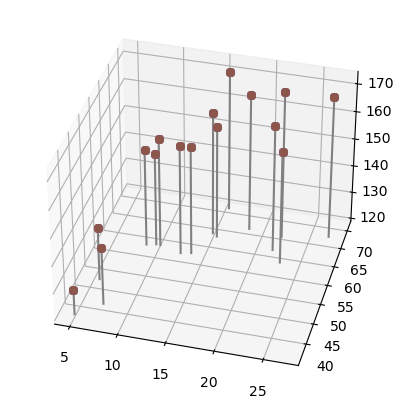

In [20]:
#나이,체중,키 3차원 그래프
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

In [22]:
#면의 표시
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,color='blue', edgecolor='black')

#면의 MSE
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t)**2)
    return mse

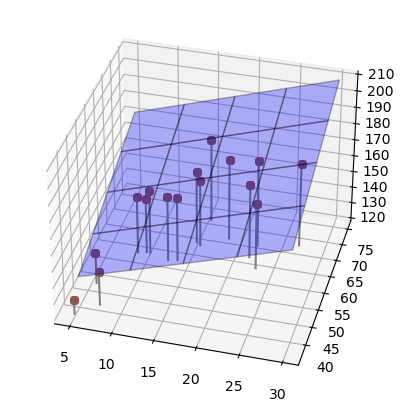

mse: 165.78895635193032


In [23]:
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
plt.show()

print('mse:',mse)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(list(zip(X0,X1)), T)
pred = lin_reg.predict(list(zip(X0,X1)))

#평균제곱오차
lin_mse = mean_squared_error(T, pred)
print(lin_mse)

#평균제곱근오차
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

#평균절대오차
lin_mae = mean_absolute_error(T, pred)
print(lin_mae)

6.479952760451312
2.545575133530989
2.2600456889986766
